<center><strong>UNIVERSITÉ DE PARIS</strong></center>
<center>MASTER I INGÉNIERIE MATHÉMATIQUE ET BIOSTATISTIQUE</center>
<center>BIG DATA</center>
<center>Groupe: James Kelson LOUIS, Lessy-Lafoi ELION</center>

Dans le cadre de la validation du Master 1 en Ingénierie mathématique et biostatistique, plus précisément pour le cours de Big Data, nous avons pour tâche la réalisation d'un projet d'analyse de données sous Python. Nous allons utiliser tous les outils vus dans le cours (et d'autres trouvés ailleurs) pour explorer ces données et proposer une analyse des données. 

Ce sont des données sur l'ensemble des transactions sur les horodateurs dans la ville de Paris pour l'année 2014. Celles-ci proviennent du site Open Data Paris, répertoire des données ouvertes de la ville de Paris. 
cette base de données contient deux collections principales :
+ transactions : ensemble des paiements
+ mobiliers: liste de tous les horodateurs

#### Description des collections

<table>
    <caption valign="top"> <strong> HORODATEURS ET DONNEES DE TRANSACTIONS </strong>
</caption>

   <tr>
       <td>Intitulé (Horodateurs)</td>
       <td>Horodateurs</td>
   </tr>
   <tr>
       <td>Intitulé (Transactions)</td>
       <td>Transactions 2014</td>
   </tr>
   <tr>
       <td>Description (Horodateurs)</td>
       <td>Cette couche de ponctuels localise géographiquement les horodateurs répartis sur l’ensemble du territoire parisien,
   gérés par la Mairie de Paris.</td>
   </tr>
    <tr>
       <td>Description (Transactions)</td>
       <td>Fichiers regroupent l’ensemble des transactions de paiement abouties en
2014. 
</td>
   </tr>
   <tr>
       <td>Source</td>
       <td>Ces fichiers sont extraits du logiciel de Système de Gestion Centralisé des Horodateurs </td>
   </tr>
</table>

<table width="100%" height="80%">

   <tr>
       <th >ATTRIBUT</th>
       <th>DÉFINITION</th>
   </tr>
   <tr>
       <td >numhoro</td>
       <td>Numéro horodateur</td>
   </tr>
   <tr>
       <td>adresse</td>
       <td>Adresse</td>
   </tr>
    <tr>
       <td>alim</td>
       <td>Type d'alimentation: Pile ou Solaire</td>
   </tr>
    <tr>
       <td>regime</td>
       <td>Type de régime: Mixte ou rotatif</td>
   </tr>
    <tr>
       <td>tarif</td>
       <td>Tarif du stationnement</td>
   </tr>
     <tr>
       <td>tarifhor</td>
       <td>Tarif horaire</td>
   </tr>
    <tr>
       <td>zoneres</td>
       <td>Zones résidentielles</td>
   </tr>
   </tr>
    <tr>
       <td>durée payée (h)</td>
       <td>Durée payée par heure</td>
   </tr>
    <tr>
       <td>montant carte</td>
       <td>Montant payée</td>
   </tr>
</table>

In [1]:
from PIL import Image

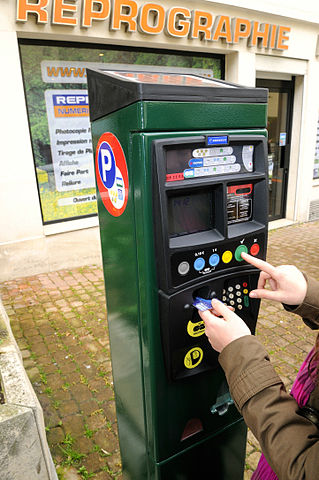

In [2]:
myImage = Image.open("horo_cb.png")
myImage

#### Importation de library

In [3]:
import pymongo
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
from folium.plugins import MarkerCluster
con = pymongo.MongoClient("mongodb://193.51.82.104:2343/")
%matplotlib inline
horo = con.horodateurs
horo.list_collection_names()

['transactions_small', 'myresults', 'transactions', 'mobiliers']

In [4]:
def affiche(res):
    pprint.pprint(list(res))

#### Affichage des premiers documents dans les deux collections
+ Mobiliers
+ Transactions

In [5]:
pprint.pprint(horo.mobiliers.find_one())

{'_id': ObjectId('56eaa4552d7eb34e4432e0fb'),
 'datasetid': 'horodateurs-mobiliers',
 'fields': {'adresse': '48 vis-à-vis RUE DE LISBONNE',
            'alim': 'SOLAIRE',
            'arrondt': 8,
            'geo_point_2d': [48.877489999731374, 2.311394999713242],
            'geo_shape': {'coordinates': [2.311394999713242,
                                          48.877489999731374],
                          'type': 'Point'},
            'modele': 'SAB3',
            'numhoro': 57080603,
            'objectid': 4383,
            'regime': 'MIX',
            'tarif': '4,00 E MIX 2U',
            'tarifhor': 4.0,
            'zoneres': '8J'},
 'geometry': {'coordinates': [2.311394999713242, 48.877489999731374],
              'type': 'Point'},
 'record_timestamp': '2015-12-02T17:49:46+00:00',
 'recordid': '698c75a21ba4f4c34e72f32ea1ecd94f9de8b88c'}


In [6]:
pprint.pprint(horo.transactions.find_one())

{'_id': ObjectId('56eaa8279fae0d71f77ea2bd'),
 'date horodateur': datetime.datetime(2014, 1, 9, 14, 9, 47),
 'durée payée (h)': 0.5,
 'début stationnement': datetime.datetime(2014, 1, 9, 14, 9, 47),
 'fin stationnement': datetime.datetime(2014, 1, 9, 14, 39, 47),
 'horodateur': 1050,
 'montant carte': 1.8,
 'moyen de paiement': 'Paris Carte',
 'usager': 'Rotatif'}


#### Nombre de transactions effectuées

In [7]:
horo.transactions.estimated_document_count() 

24448030

In [8]:
horo.transactions_small.count_documents({})

244480

#### Nombre d'horodateurs

In [9]:
horo.mobiliers.count_documents({})

7810

#### Moyen de paiement utilisé

In [10]:
horo.transactions.distinct("moyen de paiement")

['Paris Carte', 'CB']

#### Nombre de transactions pour chaque moyen de paiement

In [11]:
res=horo.transactions.aggregate([
    {"$group":{"_id":"$moyen de paiement", "nombre":{"$sum":1}}}
])
affiche(res)

[{'_id': 'CB', 'nombre': 11267015}, {'_id': 'Paris Carte', 'nombre': 13181015}]


#### Différent type d'usager

In [12]:
horo.transactions.distinct("usager")

['Rotatif', 'Résident']

#### Nombre de transactions par type d'usager

In [13]:
res=horo.transactions.aggregate([
    {"$group":{"_id":"$usager", "nombre":{"$sum":1}}}
])
affiche(res)

[{'_id': 'Résident', 'nombre': 5414133}, {'_id': 'Rotatif', 'nombre': 19033897}]


#### Durée maximale de stationnement

In [14]:
res=horo.transactions.aggregate([
    {"$group":{"_id":"durée maximale payée (h)", "temps":{"$max":"$durée payée (h)"} }}
])
affiche(res)

[{'_id': 'durée maximale payée (h)', 'temps': 50.0}]


#### Montant total des transactions

In [15]:
res=horo.transactions.aggregate([
    {"$group":{"_id":"Total","nb":{"$sum":"$montant carte"}}}
])
affiche(res)

[{'_id': 'Total', 'nb': 62444426.12}]


#### Montant total par type d'usager

In [16]:
res=horo.transactions.aggregate([
    {"$group":{"_id":"$usager","nb":{"$sum":"$montant carte"}}}
])
affiche(res)

[{'_id': 'Résident', 'nb': 11540277.93}, {'_id': 'Rotatif', 'nb': 50904148.19}]


#### Montant total par moyen de paiement

In [17]:
res=horo.transactions.aggregate([
    {"$group":{"_id":"$moyen de paiement","nb":{"$sum":"$montant carte"}}}
])
affiche(res)

[{'_id': 'CB', 'nb': 33871568.66}, {'_id': 'Paris Carte', 'nb': 28572857.46}]


####  Différents types d'alimentations

In [18]:
horo.mobiliers.distinct("fields.alim")

['SOLAIRE', 'PILE']

#### Nombre d'horodateurs par type d'alimentation

In [19]:
res=horo.mobiliers.aggregate([
    {"$group":{"_id":"$fields.alim","nb":{"$sum":1}}}
    
])
affiche(res)

[{'_id': None, 'nb': 8},
 {'_id': 'PILE', 'nb': 2994},
 {'_id': 'SOLAIRE', 'nb': 4808}]


#### Différents arrondissements représentés

In [20]:
sorted(horo.mobiliers.distinct("fields.arrondt"))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

#### Nombre de mobiliers par arrondissement

In [21]:
res = horo.mobiliers.aggregate([
    { "$group" : { "_id" : "$fields.arrondt", "nb" : { "$sum" : 1}}},
    { "$sort" : { "_id": 1}}
])
data_nb_imob=pd.DataFrame(list(res)) 
data_nb_imob.columns = ["Arrondissement", "Effectif"]
data_nb_imob.head()

Arrondissement  Effectif
0               1        87
1               2        67
2               3       133
3               4       135
4               5       267

#### Différent type de modèle d'horodateur

In [22]:
res=horo.mobiliers.distinct("fields.modele")
affiche(res)

['SAB3', 'SMB2', 'MUI']


#### Nombre d'horodateurs par modèle

In [23]:
res=horo.mobiliers.aggregate([
    {"$group":{"_id":"$fields.modele","nb":{"$sum":1}}}
    
])
affiche(res)

[{'_id': None, 'nb': 1},
 {'_id': 'SMB2', 'nb': 2995},
 {'_id': 'MUI', 'nb': 3},
 {'_id': 'SAB3', 'nb': 4811}]


#### Rem: Il y a 1 mobilier pour lequel on ne connait pas le modèle

#### Différent type de régime

In [24]:
res=horo.mobiliers.distinct("fields.regime")
affiche(res)

['MIX', 'ROT']


#### Nombre d'horodateurs par régime

In [25]:
res=horo.mobiliers.aggregate([
    {"$group":{"_id":"$fields.regime","nb":{"$sum":1}}}   
])
affiche(res)

[{'_id': 'ROT', 'nb': 1032}, {'_id': 'MIX', 'nb': 6778}]


#### Tarif horaire

In [26]:
res=horo.mobiliers.distinct("fields.tarifhor")
affiche(res)

[4.0, 2.4]


#### Nombre de transactions par horodateur

In [27]:
res=horo.transactions.aggregate([
    {"$group":{"_id":"$horodateur", "nombre":{"$sum":1}}}
])
data_horo=pd.DataFrame(list(res))
data_horo.head()

_id  nombre
0  10970601      34
1      1051      14
2  10580401      86
3  96243402     292
4  85132104     658

#### Montant total effectué par horodateur

In [28]:
res=horo.transactions.aggregate([
    {"$group":{"_id":"$horodateur","somme":{"$sum":"$montant carte"}}}
])
data_montant=pd.DataFrame(list(res))
data_montant.head()

_id    somme
0  10970601    56.65
1      1051    11.65
2  10580401   160.60
3  96243402   910.55
4  85132104  2447.37

In [29]:
data_montant["nbr_transactions"]=data_horo.nombre
data_montant.head()

_id    somme  nbr_transactions
0  10970601    56.65                34
1      1051    11.65                14
2  10580401   160.60                86
3  96243402   910.55               292
4  85132104  2447.37               658

#### Répartition des mobiliers par arrondissement et par tarif horaire

In [30]:
res=horo.mobiliers.aggregate([
  {"$project": {
        "_id": 0,
        "num_horo" : "$fields.numhoro", 
        "arrond" : "$fields.arrondt",
        "tarif":"$fields.tarifhor"
    }},
    { "$sort": {
        "arrond": 1
    }}
])
A=list(res)
data1=pd.DataFrame({"num_horo":[i["num_horo"] for i in A],"arrondt":[i["arrond"] for i in A],\
                   "tarif":[i['tarif'] for i in A]})
data1.head()

num_horo  arrondt  tarif
0  98640101        1    4.0
1  72260101        1    4.0
2  95040202        1    4.0
3  95750103        1    4.0
4  82493602        1    4.0

#### Nombre de données manquantes dans la collection transactions

In [31]:
num_manquant=list(set(data_horo._id)-set(data1.num_horo))
len(num_manquant)

117

### **** !!! On constate qu'il y a au total 117 horodateurs dans la collection transactions qui ne sont pas dans la collection mobiliers. On va donc considérer pour la suite que ce sont des données manquantes****

#### Nombre de mobiliers par arrondissement à l'aide des barres

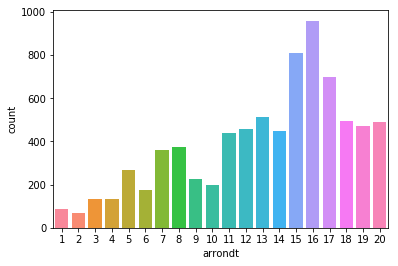

In [32]:
sns.countplot(x = "arrondt" ,data = data1,saturation=1)

#### Tarif horaire de stationnement par arrondissement

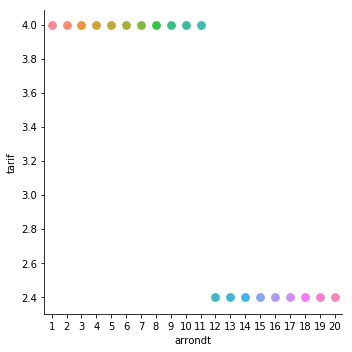

In [33]:
sns.catplot(x = "arrondt", y = "tarif", data = data1, kind = "point",hue="arrondt", join = False)

#### Pour les arrondissements 1 jusqu'à 11 le tarif horaire est de 4 euros et pour les arrondissements 12 à 20, 2.4 euros

#### Montant total des transactions sur les données manquantes

In [34]:
vect=0
for i in num_manquant:
    vect+=list(data_montant.loc[data_montant._id==i].somme)[0]
vect

514017.3100000001

#### Montant total des transactions sur les données  retenues

In [35]:
np.sum(data_montant.somme)-vect

61930408.81

#### Nombre de transactions par arrondissement

In [36]:
trans={}
for i in range(1,21):
    df1=data1[data1["arrondt"]==i]
    liste1=[i for i in df1.num_horo]
    vect=0
    for j in range(len(liste1)):
        df2=data_horo[data_horo["_id"]==liste1[j]]
        vect+=np.sum(df2["nombre"])
    trans[i]=vect
pd.Series(trans)

1      258739
2      180673
3      415849
4      394730
5      902434
6      670234
7     1193672
8     1506732
9      816611
10     553313
11    1232216
12    1553827
13    2085006
14    1682621
15    2488155
16    2764932
17    2020126
18    1143835
19    1136265
20    1251664
dtype: int64

#### Montant total par arrondissement

In [37]:
Somme_trans={}
for i in range(1,21):
    df1=data1[data1["arrondt"]==i]
    liste1=[i for i in df1.num_horo]
    vect=0
    for j in range(len(liste1)):
        df2=data_montant[data_montant["_id"]==liste1[j]]
        vect+=np.sum(df2["somme"])
    Somme_trans[i]=vect
pd.Series(Somme_trans)

1     1044486.34
2      755632.44
3     1636981.38
4     1455876.51
5     3299260.86
6     2498632.34
7     4535083.88
8     5265843.72
9     2509874.95
10    1577575.56
11    3483594.48
12    3501662.40
13    4110331.54
14    3465079.44
15    5004836.40
16    6490908.24
17    4709211.90
18    2301811.34
19    1995249.89
20    2288475.20
dtype: float64

In [38]:
#Vérification: Montant total
np.sum(list(Somme_trans.values()))

61930408.80999997

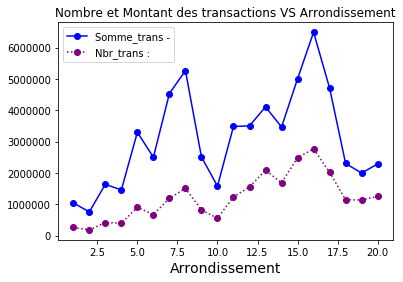

In [39]:
x0=range(1,21)
z0=list(Somme_trans.values())
z1=list(trans.values())
z2=data_nb_imob.Effectif
plt.plot(x0, z0, "o-", label="Somme_trans -",color="blue")
plt.plot(x0, z1, "o:", label="Nbr_trans :", color="purple")
plt.title("Nombre et Montant des transactions VS Arrondissement")
plt.xlabel("Arrondissement",fontsize=14)
plt.legend()
plt.show()

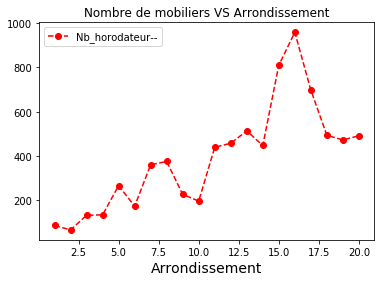

In [40]:
plt.plot(x0, z2, "o--", label="Nb_horodateur--",color="red")
plt.xlabel("Arrondissement",fontsize=14)
plt.title("Nombre de mobiliers VS Arrondissement")
plt.legend()
plt.show()

#### Rem: On constate que les trois variables ont tendance à évoluer de la même manière.

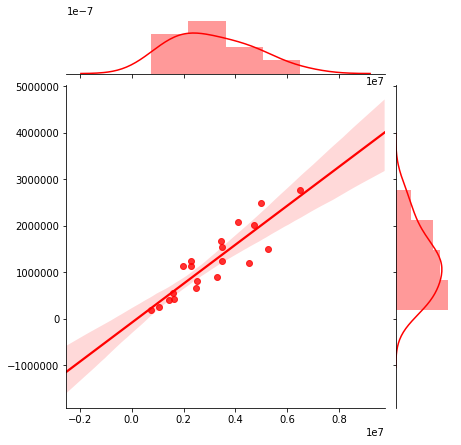

In [41]:
sns.jointplot(x = z0, y = z1, kind="reg", color="red")

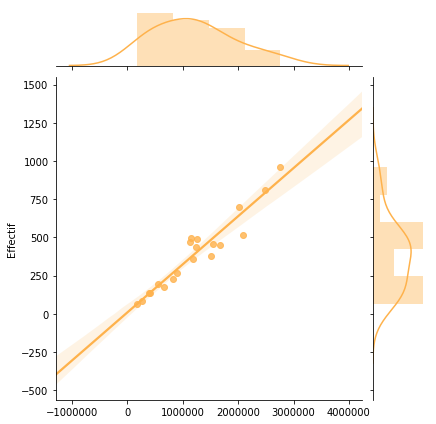

In [42]:
sns.jointplot(x = z1, y = z2, kind="reg", color="#feb24c")

In [43]:
don=pd.DataFrame({"Nombre_horo":z2,"Somme_trans":z0,"Nbr_trans":z1})
don.corr()

Nombre_horo  Somme_trans  Nbr_trans
Nombre_horo     1.000000     0.807931   0.955699
Somme_trans     0.807931     1.000000   0.892580
Nbr_trans       0.955699     0.892580   1.000000

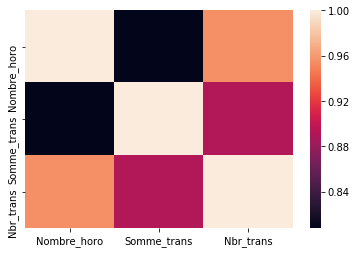

In [44]:
sns.heatmap(don.corr())

#### Au vu des graphiques précédents et au vu de la carte de chaleur on déduit qu'il y a une forte correlation entre les trois variables

#### Tarif horaire moyen par arrondissement

In [45]:
tarif_moyen_arr=pd.Series(data1.groupby('arrondt')["tarif"].mean().round(2))
tarif_moyen_arr

arrondt
1     4.0
2     4.0
3     4.0
4     4.0
5     4.0
6     4.0
7     4.0
8     4.0
9     4.0
10    4.0
11    4.0
12    2.4
13    2.4
14    2.4
15    2.4
16    2.4
17    2.4
18    2.4
19    2.4
20    2.4
Name: tarif, dtype: float64

#### Répartition des horodateurs par type d'alimentation et par arrondissement

In [46]:
res=horo.mobiliers.aggregate([
    {"$group":{"_id":{"Alimentation":"$fields.alim","Arrondissement":"$fields.arrondt"},
               "nb":{"$sum":1}}},
    {"$sort":{"fields.arrondt":1}}
])
data_alim=pd.DataFrame(list(res))
# On supprime les lignes ayant les valeurs manquantes (type d'alimentation)
data_alim1=data_alim.drop([4,5,8,24,28,32])
data_alim1.head()

_id   nb
0   {'Alimentation': 'SOLAIRE', 'Arrondissement': 7}   45
1      {'Alimentation': 'PILE', 'Arrondissement': 6}   57
2   {'Alimentation': 'SOLAIRE', 'Arrondissement': 5}   34
3      {'Alimentation': 'PILE', 'Arrondissement': 9}    1
6  {'Alimentation': 'SOLAIRE', 'Arrondissement': 18}  212

#### Nombre d'horodateurs par arrondissement pour le type d'alimentation solaire 

In [47]:
Aliment_=[i["Alimentation"] for i in data_alim1['_id']]
arrondt_=[i["Arrondissement"] for i in data_alim1['_id']]
data_alim2=pd.DataFrame({"Arrondissement":arrondt_,"Alimentation":Aliment_})
data_alim2["nb"]=data_alim1.nb
data_alim_sol=data_alim2.query("Alimentation=='SOLAIRE'").sort_values(by="Arrondissement")
data_alim_sol.iloc[[0,10,17,18],2]=0
data_alim_pile=data_alim2.query("Alimentation=='PILE'").sort_values(by="Arrondissement")
data_alim_pile.iloc[[2,9],2]=0 # On remplace les valeurs manquantes par zéro
data_al=pd.DataFrame({"Arrondissement":list(set(range(1,21))-set(data_alim_pile.Arrondissement)),
                        "Alimentation":np.repeat("PILE",20-len(data_alim_pile)),
                         "nb":np.repeat(0,20-len(data_alim_pile))})
data_alim_PILE= data_alim_pile.append(data_al, ignore_index=True).sort_values(by="Arrondissement")
data_alim2.head()

Arrondissement Alimentation    nb
0               7      SOLAIRE  45.0
1               6         PILE  57.0
2               5      SOLAIRE  34.0
3               9         PILE   1.0
4              18      SOLAIRE   NaN

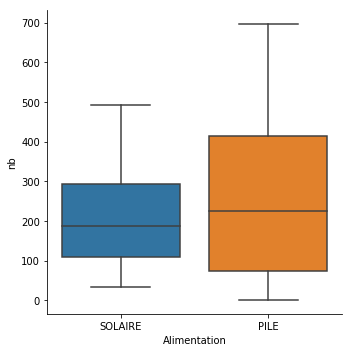

In [48]:
sns.catplot(x = "Alimentation", y = "nb", data = data_alim2, kind = "box")

#### Rem: en moyenne il y a plus de mobiliers à alimentation pile que de mobiliers à alimentation solaire

#### Nombre d'horodateurs par arrondissement pour le type d'alimentation Pile

In [49]:
data_alim_PILE.head()

Arrondissement Alimentation     nb
13               1         PILE    0.0
14               2         PILE    0.0
15               3         PILE    0.0
16               4         PILE    0.0
0                5         PILE  226.0

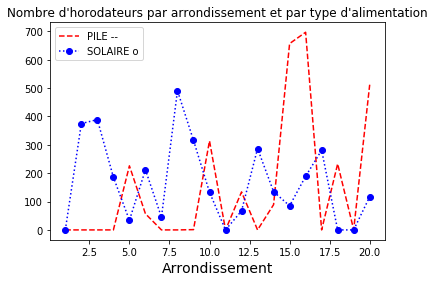

In [50]:
y10=data_alim_PILE.nb
y20=data_alim_sol.nb
plt.title("Nombre d'horodateurs par arrondissement et par type d'alimentation")
plt.plot(x0, y10, "r--", label="PILE --")
plt.plot(x0, y20, "b:o", label="SOLAIRE o")
plt.xlabel("Arrondissement",fontsize=14)
plt.legend()
plt.show()

#### Répartition des horodateurs par modèle et par arrondissement

In [51]:
res=horo.mobiliers.aggregate([
    {"$group":{"_id":{"Modele":"$fields.modele","Arrondissement":"$fields.arrondt"},
               "nb":{"$sum":1}}}
])
data_modele=pd.DataFrame(list(res))
data_modele.head()

_id  nb
0  {'Modele': 'SMB2', 'Arrondissement': 20}   1
1    {'Modele': 'MUI', 'Arrondissement': 1}   1
2   {'Modele': 'SMB2', 'Arrondissement': 9}   1
3                    {'Arrondissement': 18}   1
4   {'Modele': 'SAB3', 'Arrondissement': 7}  45

#### Nombre d'horodateurs  modèle SMB2 par arrondissement

In [52]:
## On supprime la ligne 3 [valeur manquante (modèle)]
data_modele1=data_modele.drop([3])
Modele_=[i["Modele"] for i in data_modele1['_id']]
arrondt_m=[i["Arrondissement"] for i in data_modele1['_id']]
data_modele2=pd.DataFrame({"Arrondissement":arrondt_m,"modele":Modele_})
data_modele2["nb"]=data_modele1.nb
data_modele2.head()

Arrondissement modele    nb
0              20   SMB2   1.0
1               1    MUI   1.0
2               9   SMB2   1.0
3               7   SAB3   NaN
4               6   SMB2  45.0

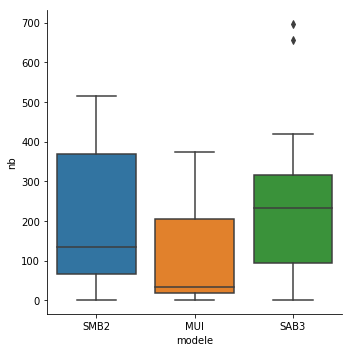

In [53]:
sns.catplot(x = "modele", y = "nb", data = data_modele2, kind = "box")

#### En moyenne on a retrouve plus  de mobiliers de modèle SAB3, ensuite SMB2 et enfin MUI. 

In [54]:
data_modele_smb=data_modele2.query("modele=='SMB2'")
dat_m2=pd.DataFrame([[1, "SMB2", 0],[2, "SMB2", 0],
                    [3, "SMB2", 0],[4, "SMB2", 0],
                     [11, "SMB2", 0],[13, "SMB2", 0],[8, "SMB2", 0]],columns=data_modele2.columns)
data_modele_smb2=data_modele_smb.append(dat_m2, ignore_index=True).sort_values(by = 'Arrondissement',
                                                                              ascending = True)
data_modele_smb2.head()

Arrondissement modele     nb
13               1   SMB2    0.0
14               2   SMB2    0.0
15               3   SMB2    0.0
16               4   SMB2    0.0
5                5   SMB2  117.0

#### Nombre d'horodateurs modèle MUI par arrondissement 

In [55]:
data_modele_mui=data_modele2.query("modele=='MUI'")
data_modele_mui
dat_mui=pd.DataFrame({"Arrondissement":[i for i in range(21) if i not in [0,1,8,15]],
             "modele":np.repeat("MUI",17),"nb":np.repeat(0,17)})
data_modele_MUI=data_modele_mui.append(dat_mui, ignore_index=True).sort_values(by="Arrondissement")
data_modele_MUI.head()

Arrondissement modele   nb
0               1    MUI  1.0
3               2    MUI  0.0
4               3    MUI  0.0
5               4    MUI  0.0
6               5    MUI  0.0

#### Nombre d'horodateurs de modèle SAB3 par arrondissement

In [56]:
data_modele_sab3=data_modele2.query("modele=='SAB3'")
data_modele_SAB3=data_modele_sab3.sort_values(by="Arrondissement")
data_modele_SAB3.iloc[[6],2]=0
data_modele_SAB3.head()

Arrondissement modele     nb
7                1   SAB3    1.0
16               2   SAB3  389.0
34               3   SAB3  314.0
21               4   SAB3    1.0
5                5   SAB3   57.0

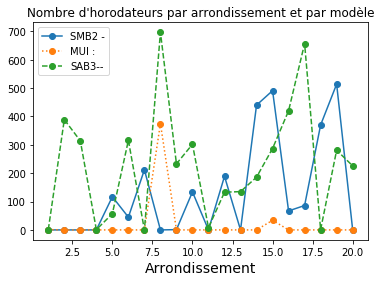

In [57]:
y0=data_modele_smb2.nb
y01=data_modele_MUI.nb
y02=data_modele_SAB3.nb
plt.title("Nombre d'horodateurs par arrondissement et par modèle")
plt.plot(x0, y0, "o-", label="SMB2 -")
plt.plot(x0, y01, "o:", label="MUI :")
plt.plot(x0, y02, "o--", label="SAB3--")
plt.xlabel("Arrondissement",fontsize=14)
plt.legend()
plt.show()

#### Nombre d'horodateurs par type de régime et par arrondissement

In [58]:
res=horo.mobiliers.aggregate([
    {"$group":{"_id":{"Regime":"$fields.regime","Arrondissement":"$fields.arrondt"},
               "nb":{"$sum":1}}}
])
data_regime=pd.DataFrame(list(res))
data_regime.head()

_id  nb
0   {'Regime': 'ROT', 'Arrondissement': 1}  24
1  {'Regime': 'ROT', 'Arrondissement': 16}  74
2   {'Regime': 'ROT', 'Arrondissement': 7}  24
3   {'Regime': 'MIX', 'Arrondissement': 3}  82
4   {'Regime': 'ROT', 'Arrondissement': 5}  26

#### Nombre d'horodateurs de régime ROT par arrondissement

In [59]:
regime_=[i["Regime"] for i in data_regime['_id']];arrondt_r=[i["Arrondissement"] for i in data_regime['_id']]
data_regime1=data_regime.drop(["_id"],axis=1)
data_regime1["Arrondissement"]=arrondt_r; data_regime1["Regime"]=regime_
data_ROT=data_regime1.sort_values(by="Arrondissement",ascending=True).query("Regime=='ROT'")
data_MIX=data_regime1.sort_values(by="Arrondissement",ascending=True).query("Regime=='MIX'")
data_ROT.head()

nb  Arrondissement Regime
0   24               1    ROT
13  18               2    ROT
34  51               3    ROT
10  17               4    ROT
4   26               5    ROT

#### Nombre d'horodateurs de régime MIX par arrondissement 

In [60]:
data_MIX.head()

nb  Arrondissement Regime
6    63               1    MIX
21   49               2    MIX
3    82               3    MIX
29  118               4    MIX
19  241               5    MIX

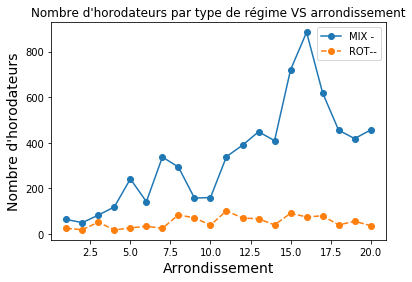

In [61]:
y1=data_MIX.nb
y2=data_ROT.nb
plt.title("Nombre d'horodateurs par type de régime VS arrondissement")
plt.plot(x0, y1, "o-", label="MIX -")
plt.plot(x0, y2, "o--", label="ROT--")
plt.xlabel("Arrondissement",fontsize=14)
plt.ylabel("Nombre d'horodateurs",fontsize=14)
plt.legend()

plt.show()

#### Montant des transactions par moyen de paiement

In [62]:
res=horo.transactions.aggregate([
    
    {"$group":{"_id":{"montant_carte":"$montant carte",
                      "moyen":"$moyen de paiement"},"nb":{"$sum":1}}},
    {
        "$sort":{"nb":1}
    }    
])
df0=pd.DataFrame(list(res))
df0.head()

_id  nb
0  {'montant_carte': 5.12, 'moyen': 'Paris Carte'}   1
1  {'montant_carte': 5.98, 'moyen': 'Paris Carte'}   1
2           {'montant_carte': 0.28, 'moyen': 'CB'}   1
3           {'montant_carte': 4.51, 'moyen': 'CB'}   1
4  {'montant_carte': 6.89, 'moyen': 'Paris Carte'}   1

In [63]:
df0["montant_carte"]=[i["montant_carte"] for i in df0._id]
df0["moyen_paiement"]=[i["moyen"] for i in df0._id]
df0["somme"]=df0.nb*df0.montant_carte
df0.head()

_id  nb  montant_carte  \
0  {'montant_carte': 5.12, 'moyen': 'Paris Carte'}   1           5.12   
1  {'montant_carte': 5.98, 'moyen': 'Paris Carte'}   1           5.98   
2           {'montant_carte': 0.28, 'moyen': 'CB'}   1           0.28   
3           {'montant_carte': 4.51, 'moyen': 'CB'}   1           4.51   
4  {'montant_carte': 6.89, 'moyen': 'Paris Carte'}   1           6.89   

  moyen_paiement  somme  
0    Paris Carte   5.12  
1    Paris Carte   5.98  
2             CB   0.28  
3             CB   4.51  
4    Paris Carte   6.89

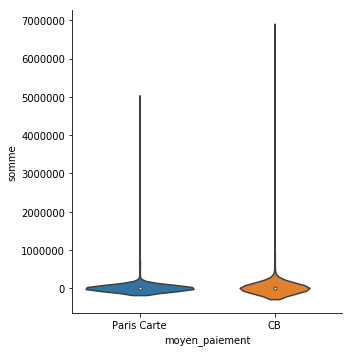

In [64]:
sns.catplot(x = "moyen_paiement", y = "somme", data = df0, kind = "violin")

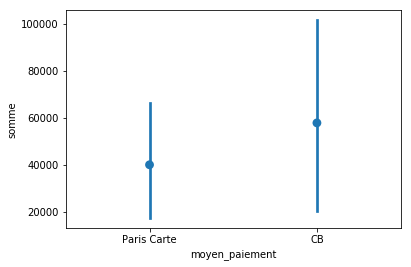

In [65]:
sns.pointplot(x ="moyen_paiement", y = "somme", data = df0, kind = "point",join=False)

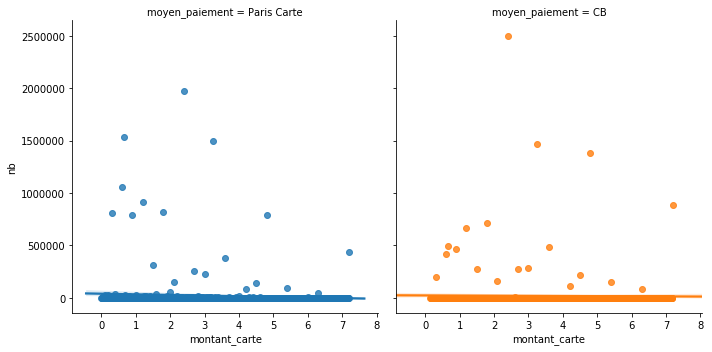

In [66]:
sns.lmplot("montant_carte", "nb", hue = "moyen_paiement", col = "moyen_paiement", data = df0)

In [67]:
df0.groupby("moyen_paiement")["somme"].mean()

moyen_paiement
CB             57900.117368
Paris Carte    40074.133885
Name: somme, dtype: float64

#### Rem: En moyenne on constate une légère différence entre le montant total effectué par Paris carte et par CB

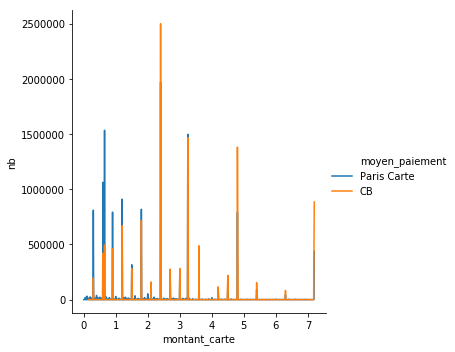

In [68]:
sns.relplot(x="montant_carte", y="nb", hue="moyen_paiement", kind="line", data=df0)

#### Nombre de transactions par montant et par type d'usager

In [69]:
res=horo.transactions.aggregate([
    
    {"$group":{"_id":{"montant_carte":"$montant carte",
                      "usager":"$usager"},"nb":{"$sum":1}}},
    {
        "$sort":{"nb":1}
    }   
])
df1=pd.DataFrame(list(res))
df1.head()

_id  nb
0  {'montant_carte': 5.68, 'usager': 'Rotatif'}   1
1  {'montant_carte': 5.72, 'usager': 'Rotatif'}   1
2  {'montant_carte': 7.11, 'usager': 'Rotatif'}   1
3  {'montant_carte': 6.21, 'usager': 'Rotatif'}   1
4  {'montant_carte': 5.91, 'usager': 'Rotatif'}   1

In [70]:
df1["montant_carte"]=[i["montant_carte"] for i in df1._id]
df1["usager"]=[i["usager"] for i in df1._id]
df1["total"]=df1.nb*df1.montant_carte
df1.head()

_id  nb  montant_carte   usager  \
0  {'montant_carte': 5.68, 'usager': 'Rotatif'}   1           5.68  Rotatif   
1  {'montant_carte': 5.72, 'usager': 'Rotatif'}   1           5.72  Rotatif   
2  {'montant_carte': 7.11, 'usager': 'Rotatif'}   1           7.11  Rotatif   
3  {'montant_carte': 6.21, 'usager': 'Rotatif'}   1           6.21  Rotatif   
4  {'montant_carte': 5.91, 'usager': 'Rotatif'}   1           5.91  Rotatif   

   total  
0   5.68  
1   5.72  
2   7.11  
3   6.21  
4   5.91

#### Nombre de transactions par horodateur et par type d'usager

In [71]:
res=horo.transactions.aggregate([
    
    {"$group":{"_id":{"num":"$horodateur",
                      "usager":"$usager"},"nb":{"$sum":1}}},
    {
        "$sort":{"nb":1}
    }   
])
df2=pd.DataFrame(list(res))
df2.head()

_id  nb
0        {'num': 610, 'usager': 'Rotatif'}   1
1        {'num': 110, 'usager': 'Rotatif'}   1
2      {'num': 1010, 'usager': 'Résident'}   1
3  {'num': 77010302, 'usager': 'Résident'}   1
4  {'num': 82410801, 'usager': 'Résident'}   1

#### Nombre de transactions pour le type d'usager Résident

In [72]:
df2["_id1"]=[i["num"] for i in df2._id]
df2["usager"]=[i["usager"] for i in df2._id]
df2_usager_rot=df2.drop(["_id"],axis=1).query("usager=='Rotatif'")
df2_usager_res=df2.drop(["_id"],axis=1).query("usager=='Résident'")
df2_usager_res.head()

nb      _id1    usager
2   1      1010  Résident
3   1  77010302  Résident
4   1  82410801  Résident
5   2  29170101  Résident
7   2  33380202  Résident

#### Nombre de transactions par arrondissement pour le type d'usager Résident

In [73]:
usager_res={}
for i in range(1,21):
    df1=data1[data1["arrondt"]==i]
    liste1=[i for i in df1.num_horo]
    vect=0
    for j in range(len(liste1)):
        df2=df2_usager_res[df2_usager_res["_id1"]==liste1[j]]
        vect+=np.sum(df2["nb"])
    usager_res[i]=vect
pd.Series(usager_res)

1      32172
2      23982
3      70295
4      84921
5     202457
6     126633
7     312273
8     232599
9     149387
10    117190
11    275465
12    324362
13    409816
14    350974
15    550574
16    659928
17    513033
18    335381
19    255894
20    343967
dtype: int64

#### Nombre de transactions pour le type d'usager Rotatif

In [74]:
df2_usager_rot.head()

nb      _id1   usager
0    1       610  Rotatif
1    1       110  Rotatif
6    2      1010  Rotatif
18   6  99980105  Rotatif
27  10  47270101  Rotatif

#### Nombre de transactions par arrondissement pour le type d'usager Rotatif

In [75]:
usager_r={}
for i in range(1,21):
    df1=data1[data1["arrondt"]==i]
    liste1=[i for i in df1.num_horo]
    vect=0
    for j in range(len(liste1)):
        df2=df2_usager_rot[df2_usager_rot["_id1"]==liste1[j]]
        vect+=np.sum(df2["nb"])
    usager_r[i]=vect
pd.Series(usager_r)

1      226567
2      156691
3      345554
4      309809
5      699977
6      543601
7      881399
8     1274133
9      667224
10     436123
11     956751
12    1229465
13    1675190
14    1331647
15    1937581
16    2105004
17    1507093
18     808454
19     880371
20     907697
dtype: int64

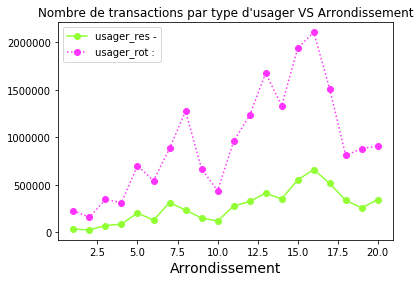

In [76]:
t0=list(usager_res.values())
t1=list(usager_r.values())
plt.plot(x0, t0, "o-", label="usager_res -",color="#91FF33")
plt.plot(x0, t1, "o:", label="usager_rot :", color="#FF33FE")
plt.title("Nombre de transactions par type d'usager VS Arrondissement")
plt.xlabel("Arrondissement",fontsize=14)
plt.legend()
plt.show()

#### Nombre de transactions par moyen de paiement et par horodateur

In [77]:
res=horo.transactions.aggregate([
    
    {"$group":{"_id":{"num":"$horodateur",
                      "moyen":"$moyen de paiement"},"nb":{"$sum":1}}},
    {
        "$sort":{"nb":1}
    }    
])
df3=pd.DataFrame(list(res))
df3.head()

_id  nb
0       {'num': 610, 'moyen': 'Paris Carte'}   1
1       {'num': 110, 'moyen': 'Paris Carte'}   1
2  {'num': 54881104, 'moyen': 'Paris Carte'}   2
3      {'num': 1010, 'moyen': 'Paris Carte'}   3
4           {'num': 82410801, 'moyen': 'CB'}   5

In [78]:
df3["_id1"]=[i["num"] for i in df3._id]
df3["moyen"]=[i["moyen"] for i in df3._id]
df3_PC=df3.query("moyen=='Paris Carte'")
df3_PC.head()

_id  nb      _id1        moyen
0       {'num': 610, 'moyen': 'Paris Carte'}   1       610  Paris Carte
1       {'num': 110, 'moyen': 'Paris Carte'}   1       110  Paris Carte
2  {'num': 54881104, 'moyen': 'Paris Carte'}   2  54881104  Paris Carte
3      {'num': 1010, 'moyen': 'Paris Carte'}   3      1010  Paris Carte
5  {'num': 99980105, 'moyen': 'Paris Carte'}   6  99980105  Paris Carte

#### Nombre transactions par arrondissement pour le moyen de paiement Paris Carte

In [79]:
moyen_PC={}
for i in range(1,21):
    df1=data1[data1["arrondt"]==i]
    liste1=[i for i in df1.num_horo]
    vect=0
    for j in range(len(liste1)):
        df2=df3_PC[df3_PC["_id1"]==liste1[j]]
        vect+=np.sum(df2["nb"])
    moyen_PC[i]=vect
pd.Series(moyen_PC)

1      131543
2       88267
3      210957
4      203497
5      462276
6      351055
7      611882
8      735672
9      438970
10     300320
11     669701
12     843453
13    1165841
14     901258
15    1335498
16    1479896
17    1082074
18     667879
19     654601
20     737201
dtype: int64

In [80]:
df3_CB=df3.query("moyen=='CB'")
df3_CB.head()

_id  nb      _id1 moyen
4   {'num': 82410801, 'moyen': 'CB'}   5  82410801    CB
9   {'num': 77010302, 'moyen': 'CB'}   7  77010302    CB
11  {'num': 61490702, 'moyen': 'CB'}   9  61490702    CB
12  {'num': 47270101, 'moyen': 'CB'}  10  47270101    CB
14  {'num': 10460102, 'moyen': 'CB'}  11  10460102    CB

#### Nombre transactions par arrondissement pour le moyen de paiement CB

In [81]:
moyen_CB={}
for i in range(1,21):
    df1=data1[data1["arrondt"]==i]
    liste1=[i for i in df1.num_horo]
    vect=0
    for j in range(len(liste1)):
        df2=df3_CB[df3_CB["_id1"]==liste1[j]]
        vect+=np.sum(df2["nb"])
    moyen_CB[i]=vect
pd.Series(moyen_CB)

1      127196
2       92406
3      204892
4      191233
5      440158
6      319179
7      581790
8      771060
9      377641
10     252993
11     562515
12     710374
13     919165
14     781363
15    1152657
16    1285036
17     938052
18     475956
19     481664
20     514463
dtype: int64

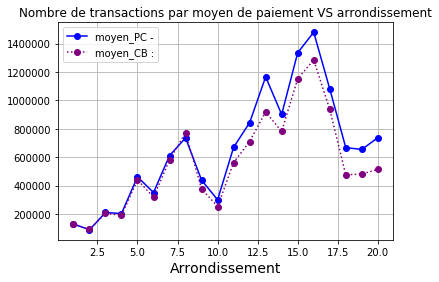

In [82]:
h0=list(moyen_PC.values())
h1=list(moyen_CB.values())
plt.plot(x0, h0, "o-", label="moyen_PC -",color="blue")
plt.plot(x0, h1, "o:", label="moyen_CB :", color="purple")
plt.title("Nombre de transactions par moyen de paiement VS arrondissement")
plt.xlabel("Arrondissement",fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [83]:
print(df3.groupby("moyen")["nb"].mean())
ast=(abs(df3_CB.nb.mean()-df3_PC.nb.mean())).round()
'Soit une différence en moyenne de : {ast} ' . format ( ast=str(ast))

moyen
CB             1423.861367
Paris Carte    1664.059462
Name: nb, dtype: float64


'Soit une différence en moyenne de : 240.0 '

#### Rem: On constate une légère différence entre le nombre de transactions effectués par Paris Carte et CB

#### Nombre de transactions par montant et par durée payée

In [84]:
res=horo.transactions.aggregate([
    
    {"$group":{"_id":{"durée_payée":"$durée payée (h)","montant_carte":"$montant carte"},"nb":{"$sum":1}}}    
])
df4=pd.DataFrame(list(res))
df4.head()

_id  nb
0    {'durée_payée': 1.0, 'montant_carte': 4.0}   1
1  {'durée_payée': 9.17, 'montant_carte': 1.25}   1
2   {'durée_payée': 7.7, 'montant_carte': 1.05}   1
3  {'durée_payée': 1.83, 'montant_carte': 0.25}   1
4   {'durée_payée': 0.25, 'montant_carte': 1.0}   3

In [85]:
df4["durée_payée"]=[i['durée_payée'] for i in df4._id]
df4["montant_carte"]=[i['montant_carte'] for i in df4._id]
df4.head()

_id  nb  durée_payée  \
0    {'durée_payée': 1.0, 'montant_carte': 4.0}   1         1.00   
1  {'durée_payée': 9.17, 'montant_carte': 1.25}   1         9.17   
2   {'durée_payée': 7.7, 'montant_carte': 1.05}   1         7.70   
3  {'durée_payée': 1.83, 'montant_carte': 0.25}   1         1.83   
4   {'durée_payée': 0.25, 'montant_carte': 1.0}   3         0.25   

   montant_carte  
0           4.00  
1           1.25  
2           1.05  
3           0.25  
4           1.00

#### Estimation de la densité en 2d 

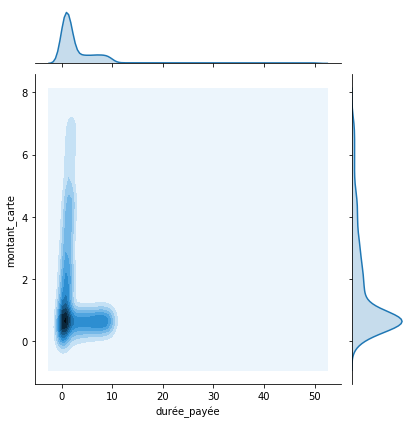

In [86]:
sns.jointplot(x = "durée_payée", y = "montant_carte", data = df4, kind = "kde")

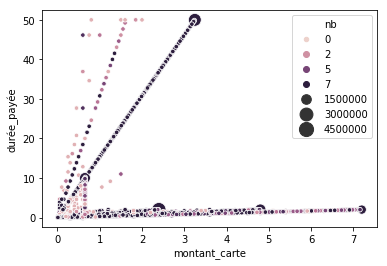

In [87]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="montant_carte", y="durée_payée",
                          hue="nb", size="nb",
                          sizes=(20, 200), hue_norm=(0, 7),
                           data=df4)

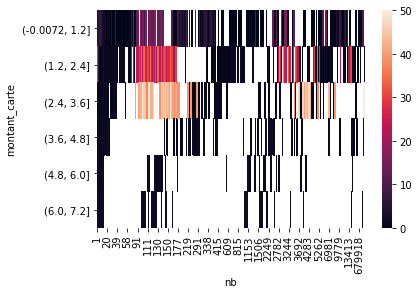

In [88]:
t = pd.crosstab(pd.cut(df4.montant_carte, bins = 6),
                    df4.nb,
                    values = df4.durée_payée, aggfunc = np.mean)
sns.heatmap(t)

#### Nous allons regrouper les variables précédentes pour créer un dataframe, afin de pouvoir réaliser une analyse des composantes principales.

<table  border="1" class="dataframe">

   <tr>
       <th >VARIABLE</th>
       <th>DESCRIPTION</th>
   </tr>
   <tr>
       <td align="left">Arrondt</td>
       <td>Arrondissement</td>
   </tr>
   <tr>
       <td>Nbr_mob</td>
       <td>Nombre de mobiliers par arrondissement</td>
   </tr>
    <tr>
       <td>Nbr_trans</td>
       <td>Nombre de transactions par arrondissement</td>
   </tr>
    <tr>
       <td>Sum_trans</td>
       <td>Montant total des transactions par arrondissement</td>
   </tr>
    <tr>
       <td>Tarif_moy</td>
       <td>Tarif moyen de stationnement par arrondissement</td>
   </tr>
     <tr>
       <td>Nbr_reg_rot</td>
       <td>Nombre d'horodateurs de régime ROT par arrondissement</td>
   </tr>
    <tr>
       <td>Nbr_reg_mix</td>
       <td>Nombre d'horodateurs de régime MIX par arrondissement</td>
   </tr>
   </tr>
    <tr>
       <td>Nbr_mod_SMB2</td>
       <td>Nombre d'horodateurs de  modèle SMB2 par arrondissement</td>
   </tr>
    <tr>
       <td>Nbr_mod_MUI</td>
       <td>Nombre  d'horodateurs de  modèle MUI par arrondissement</td>
   </tr>
   <tr>
       <td>Nbr_mod_SAB3</td>
       <td>Nombre d'horodateurs de  modèle SAB3 par arrondissement</td>
   </tr>
   <tr>
       <td>Nbr_alim_pile</td>
       <td>Nombre d'horodateurs à pile par arrondissement</td>
   </tr>
   <tr>
       <td>Nbr_alim_sol</td>
       <td>Nombre d'horodateurs à alimentation solaire par arrondissement</td>
   </tr>
   <tr>
       <td>moyen_PC</td>
       <td>Montant payée par moyen: Paris Carte par arrondissement</td>
   </tr>
     <tr>
       <td>moyen_CB</td>
       <td>Montant payée payée par moyen: CB par arrondissement</td>
   </tr>
   <tr>
       <td>usager_res</td>
       <td>Nombre de transactions par arrondissement pour le type d'usager Résident</td>
   </tr>
    <tr>
       <td>usager_rot</td>
       <td>Nombre de transactions par arrondissement pour le type d'usager Rotatif</td>
   </tr>
</table>

In [89]:
New_data=pd.DataFrame({"Arrondt":range(1,21),"Nbr_mob":list(data_nb_imob.Effectif),"Nbr_trans":list(trans.values()),
              "Sum_trans":list(Somme_trans.values()),"Tarif_moy":list(tarif_moyen_arr),"Nbr_reg_rot":list(data_ROT.nb),
              "Nbr_reg_mix":list(data_MIX.nb),"Nbr_mod_SMB2":list(data_modele_smb2.nb),
             "Nbr_mod_MUI":list(data_modele_MUI.nb),"Nbr_mod_SAB3":list(data_modele_SAB3.nb),
            "Nbr_alim_pile":list(data_alim_PILE.nb),"Nbr_alim_sol":list(data_alim_sol.nb),
             "moyen_PC":h0,"moyen_CB":h1,"usager_res":t0,"usager_rot":t1}, index=range(20))
X=New_data.iloc[:,1:]
New_data

Arrondt  Nbr_mob  Nbr_trans   Sum_trans  Tarif_moy  Nbr_reg_rot  \
0         1       87     258739  1044486.34        4.0           24   
1         2       67     180673   755632.44        4.0           18   
2         3      133     415849  1636981.38        4.0           51   
3         4      135     394730  1455876.51        4.0           17   
4         5      267     902434  3299260.86        4.0           26   
5         6      174     670234  2498632.34        4.0           33   
6         7      361    1193672  4535083.88        4.0           24   
7         8      376    1506732  5265843.72        4.0           83   
8         9      227     816611  2509874.95        4.0           70   
9        10      197     553313  1577575.56        4.0           38   
10       11      440    1232216  3483594.48        4.0          101   
11       12      458    1553827  3501662.40        2.4           69   
12       13      514    2085006  4110331.54        2.4           66   
13       14      448    1682621  3465079.44        2.4           39   
14       15      810    2488155  5004836.40        2.4           90   
15       16      959    2764932  6490908.24        2.4           74   
16       17      698    2020126  4709211.90        2.4           79   
17       18      494    1143835  2301811.34        2.4           39   
18       19      473    1136265  1995249.89        2.4           55   
19       20      492    1251664  2288475.20        2.4           36   

    Nbr_reg_mix  Nbr_mod_SMB2  Nbr_mod_MUI  Nbr_mod_SAB3  Nbr_alim_pile  \
0            63           0.0          1.0           1.0            0.0   
1            49           0.0          0.0         389.0            0.0   
2            82           0.0          0.0         314.0            0.0   
3           118           0.0          0.0           1.0            0.0   
4           241         117.0          0.0          57.0          226.0   
5           141          45.0          0.0         316.0           57.0   
6           337         212.0          0.0           0.0            0.0   
7           293           0.0        375.0         697.0            0.0   
8           157           1.0          0.0         233.0            1.0   
9           159         134.0          0.0         302.0          314.0   
10          339           0.0          0.0           8.0            0.0   
11          389         189.0          0.0         133.0          134.0   
12          448           0.0          0.0         135.0            0.0   
13          409         440.0          0.0         186.0           89.0   
14          720         491.0         34.0         287.0          657.0   
15          885          67.0          0.0         420.0          697.0   
16          619          86.0          0.0         657.0            0.0   
17          455         370.0          0.0           1.0          233.0   
18          418         514.0          0.0         281.0            1.0   
19          456           1.0          0.0         226.0          512.0   

    Nbr_alim_sol  moyen_PC  moyen_CB  usager_res  usager_rot  
0            0.0    131543    127196       32172      226567  
1          375.0     88267     92406       23982      156691  
2          389.0    210957    204892       70295      345554  
3          186.0    203497    191233       84921      309809  
4           34.0    462276    440158      202457      699977  
5          212.0    351055    319179      126633      543601  
6           45.0    611882    581790      312273      881399  
7          491.0    735672    771060      232599     1274133  
8          316.0    438970    377641      149387      667224  
9          133.0    300320    252993      117190      436123  
10           0.0    669701    562515      275465      956751  
11          67.0    843453    710374      324362     1229465  
12         287.0   1165841    919165      409816     1675190  
13         135.0    901258    781363      350974     1

#### Corrélation entre les variables

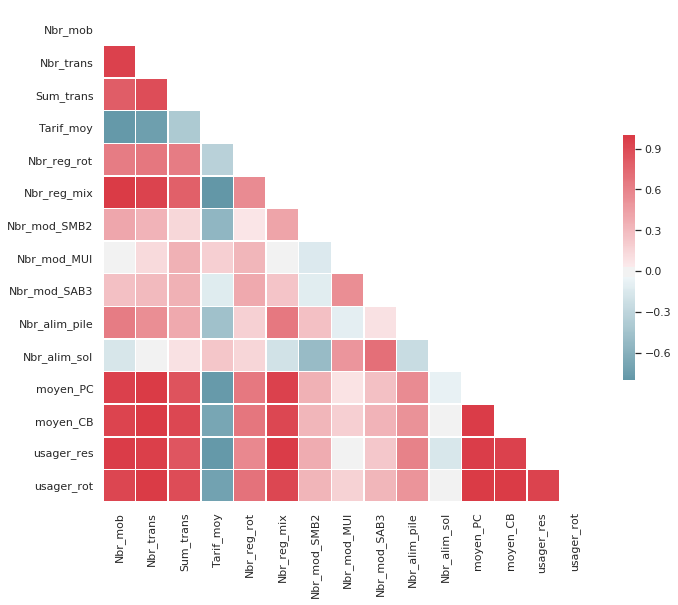

In [90]:
sns.set(style="white")
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Faisons une analyse de composantes principales 

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [92]:
pca = PCA()
pca.fit(scale(X))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[9.67049974e+00 2.80798795e+00 8.51885336e-01 8.19130468e-01
 6.65500989e-01 4.35444501e-01 2.67191741e-01 1.90783805e-01
 5.81540992e-02 1.57941591e-02 5.21536038e-03 1.88553237e-03
 2.97075649e-32 1.13071388e-32 6.82162208e-33]
[6.12464984e-01 1.77839237e-01 5.39527380e-02 5.18782630e-02
 4.21483960e-02 2.75781517e-02 1.69221436e-02 1.20829743e-02
 3.68309295e-03 1.00029674e-03 3.30306157e-04 1.19417050e-04
 1.88147911e-33 7.16118789e-34 4.32036065e-34]


In [94]:
tab = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(15)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
tab.head()

Dimension  Valeur propre  % variance expliquée  % cum. var. expliquée
0      Dim1       9.670500                  61.0                   61.0
1      Dim2       2.807988                  18.0                   79.0
2      Dim3       0.851885                   5.0                   84.0
3      Dim4       0.819130                   5.0                   90.0
4      Dim5       0.665501                   4.0                   94.0

#### La première composante accapare 61% de la variance, il y a donc un fort effet de taille dans les données.

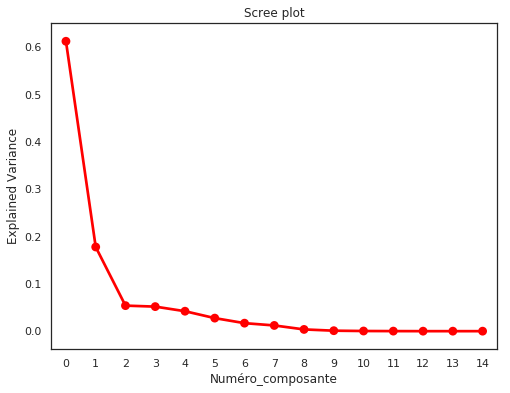

In [95]:
n_components = 15
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_,color="red")
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Numéro_composante')
ax.set_ylabel('Explained Variance')
plt.show()

In [96]:
reduced=pca.fit_transform(X)
for i in range(0, n_components):
    X['PC' + str(i + 1)] = reduced[:, i]

display(X.head())

Nbr_mob  Nbr_trans   Sum_trans  Tarif_moy  Nbr_reg_rot  Nbr_reg_mix  \
0       87     258739  1044486.34        4.0           24           63   
1       67     180673   755632.44        4.0           18           49   
2      133     415849  1636981.38        4.0           51           82   
3      135     394730  1455876.51        4.0           17          118   
4      267     902434  3299260.86        4.0           26          241   

   Nbr_mod_SMB2  Nbr_mod_MUI  Nbr_mod_SAB3  Nbr_alim_pile  ...         PC6  \
0           0.0          1.0           1.0            0.0  ...  -31.981193   
1           0.0          0.0         389.0            0.0  ...   13.041501   
2           0.0          0.0         314.0            0.0  ...    2.882263   
3           0.0          0.0           1.0            0.0  ...   26.856229   
4         117.0          0.0          57.0          226.0  ... -148.499438   

          PC7         PC8        PC9       PC10       PC11      PC12  \
0 -163.312358  133.939140  21.032885 -23.015003 -12.943961 -0.002174   
1  -31.204109  -41.617307  -1.251436  14.170073 -12.652986 -0.105699   
2  -26.181849  -84.231500  -7.562871  51.713746  14.981668  0.225612   
3 -198.225597  -24.659879  76.239235  22.773733 -16.183725 -0.083262   
4   -1.498284   -0.002043 -41.711740 -19.759273  -9.105369  0.067956   

           PC13          PC14          PC15  
0  1.762500e-10  5.261184e-11  1.227801e-14  
1  8.275415e-11 -1.745189e-11 -1.114621e-13  
2  7.389835e-11  1.987099e-11  9.410805e-13  
3  4.827632e-11 -4.672668e-11 -3.217347e-13  
4  1.730215e-11 -1.253635e-11  4.389191e-13  

[5 rows x 30 columns]

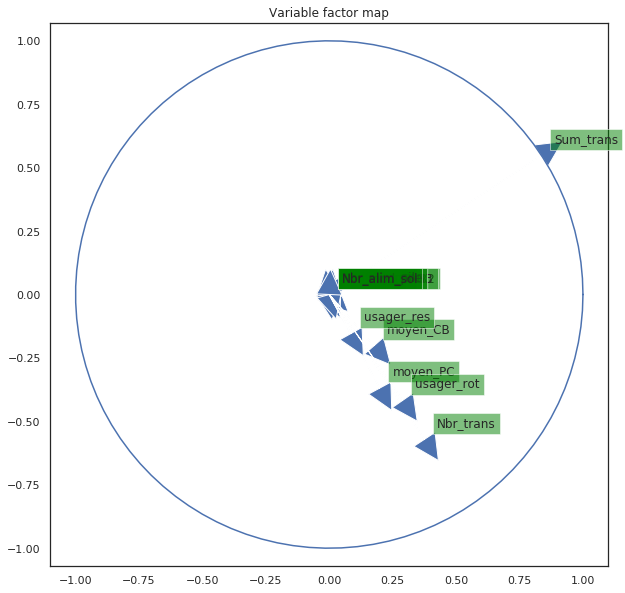

In [97]:
(fig, ax) = plt.subplots(figsize=(10, 10))
for i in range(0, 15):
    ax.arrow(0,
             0,  
             pca.components_[0, i],  
             pca.components_[1, i],  
             head_width=0.1,
             head_length=0.1)
    plt.text(pca.components_[0, i] + 0.05,
         pca.components_[1, i] + 0.05,
         X.columns.values[i],bbox=dict(facecolor='green', alpha=0.5))

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

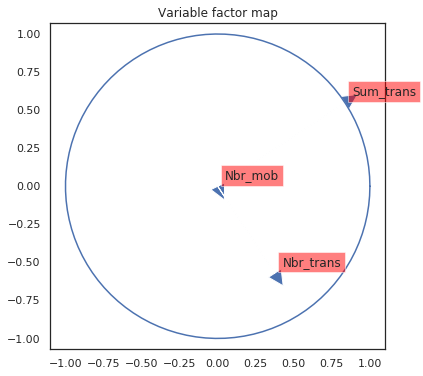

In [98]:
(fig, ax) = plt.subplots(figsize=(6, 6))
for i in range(0, 3):
    ax.arrow(0,
             0,  
             pca.components_[0, i],  
             pca.components_[1, i],  
             head_width=0.1,
             head_length=0.1)
    plt.text(pca.components_[0, i] + 0.05,
         pca.components_[1, i] + 0.05,
         X.columns.values[i],bbox=dict(facecolor='red', alpha=0.5))

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

#### On transforme la collection mobiliers en dataframe.

In [99]:
res=horo.mobiliers.find()
dm=pd.DataFrame(list(res))
dm.head()

_id              datasetid  \
0  56eaa4552d7eb34e4432e0fb  horodateurs-mobiliers   
1  56eaa4552d7eb34e4432e0fc  horodateurs-mobiliers   
2  56eaa4552d7eb34e4432e0fd  horodateurs-mobiliers   
3  56eaa4552d7eb34e4432e0fe  horodateurs-mobiliers   
4  56eaa4552d7eb34e4432e0ff  horodateurs-mobiliers   

                                              fields  \
0  {'tarifhor': 4.0, 'alim': 'SOLAIRE', 'objectid...   
1  {'tarifhor': 2.4, 'alim': 'PILE', 'objectid': ...   
2  {'tarifhor': 2.4, 'alim': 'SOLAIRE', 'objectid...   
3  {'tarifhor': 2.4, 'alim': 'SOLAIRE', 'objectid...   
4  {'tarifhor': 2.4, 'alim': 'PILE', 'objectid': ...   

                                            geometry  \
0  {'type': 'Point', 'coordinates': [2.3113949997...   
1  {'type': 'Point', 'coordinates': [2.3836700005...   
2  {'type': 'Point', 'coordinates': [2.3022399994...   
3  {'type': 'Point', 'coordinates': [2.3427700003...   
4  {'type': 'Point', 'coordinates': [2.3344580003...   

            record_timestamp                                  recordid  
0  2015-12-02T17:49:46+00:00  698c75a21ba4f4c34e72f32ea1ecd94f9de8b88c  
1  2015-12-02T17:49:46+00:00  478333b41be4962ea9140aad3e90a0a92834dddf  
2  2015-12-02T17:49:46+00:00  3d838ecceb95194f463bb63173cae5abdfe65fe1  
3  2015-12-02T17:49:46+00:00  950a911e3f43e117f0db27006a5acbf7a11fd52c  
4  2015-12-02T17:49:46+00:00  d786ba24fb1a30a975ef5ee89ffc8e5a76f3a221

#### On choisit les 7 arrondissements les moins représentés en terme de nombre de mobiliers

In [100]:
data_nb_imob.sort_values(by="Effectif").head(7)["Effectif"].sum()
moins=list(data_nb_imob.sort_values(by="Effectif").head(7).Arrondissement)
sorted(moins)

[1, 2, 3, 4, 6, 9, 10]

#### On récupère l'arrondissement, l'adresse, et le tarif horaire de stationnement pour les mobiliers dans ces arrondissements

In [101]:
res=horo.mobiliers.find({"fields.arrondt":{"$in": moins}},
                        {"_id":0,"fields.geo_point_2d":1,"fields.arrondt":1,"fields.tarifhor":1,
                        "fields.adresse":1})
d1_7=pd.DataFrame(list(res))
d1_7.head()

fields
0  {'tarifhor': 4.0, 'adresse': '13 RUE DES LIONS...
1  {'tarifhor': 4.0, 'adresse': '38 RUE LE PELETI...
2  {'tarifhor': 4.0, 'adresse': '30 RUE DE LONDRE...
3  {'tarifhor': 4.0, 'adresse': '52 RUE LOUIS BLA...
4  {'tarifhor': 4.0, 'adresse': '14 RUE D ENGHIEN...

#### Représentation

In [102]:
centre = [48.86, 2.35]
carte = folium.Map(location = centre, zoom_start = 12, tiles ='Cartodb Positron')
groupes = MarkerCluster().add_to(carte)
for i in range(len(d1_7)):
    pr=d1_7.fields[i]
    centre1=pr["geo_point_2d"]
    adr=pr["adresse"]
    tr=pr["tarifhor"]
    pop=pr["arrondt"]
    folium.Marker(location=centre1,tooltip=str(adr)+", tarif: "+str(tr)+"€",\
                  popup=str(pop),icon=folium.Icon(icon="car",color='purple',\
                                                  icon_color="blue",prefix="fa")).add_to(groupes)
carte

#### Les trois arrondissements les plus représentés

In [103]:
plus=list(data_nb_imob.sort_values(by="Effectif").tail(3).Arrondissement)
plus

[17, 15, 16]

In [104]:
res=horo.mobiliers.find({"fields.arrondt":{"$in": plus}},
                        {"_id":0,"fields.geo_point_2d":1,"fields.arrondt":1,"fields.tarifhor":1,
                        "fields.adresse":1})
d1_2=pd.DataFrame(list(res))
d1_2.shape

(2467, 1)

#### 1000 horodateurs parmi les 2467

In [105]:
centre = [48.86, 2.35]
carte = folium.Map(location = centre, zoom_start = 12, tiles ='Cartodb Positron')
groupes = MarkerCluster().add_to(carte)
for i in range(1000):
    pr=d1_2.fields[i]
    centre1=pr["geo_point_2d"]
    adr=pr["adresse"]
    tr=pr["tarifhor"]
    pop=pr["arrondt"]
    folium.Marker(location=centre1,tooltip=str(adr)+",tarif: "+str(tr)+"€",\
                  popup=str(pop),icon=folium.Icon(icon="car",color='purple',\
                                                  icon_color="black",prefix="fa")).add_to(groupes)
carte

In [106]:
import json

geo = json.load(open("paris-arrondissements.geojson"))

#### Nombre de mobiliers par quartier

In [107]:
centre = [48.86, 2.35]
carte = folium.Map(location = centre, zoom_start = 12,tiles ='Cartodb Positron')
folium.Choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = New_data, columns = ["Arrondt", "Nbr_mob"],
                 fill_color= "Pastel1",
                 legend_name = "Nombre de mobiliers par arrondissement").add_to(carte)
carte

#### Nombre de transactions par quartier

In [108]:
carte = folium.Map(location = centre, zoom_start = 12,tiles ='Cartodb Positron')
folium.Choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = New_data, columns = ["Arrondt", "Nbr_trans"],
                 fill_color= "Pastel1",
                 legend_name = "Nombre de transactions par quartier").add_to(carte)
carte 

#### Montant total des transactions par arrondissement

In [109]:
carte = folium.Map(location = centre, zoom_start = 12,tiles ='Cartodb Positron')
folium.Choropleth(geo_data = geo, key_on = "feature.properties.c_ar",
                 data = New_data, columns = ["Arrondt", "Sum_trans"],
                 fill_color= "Pastel1",
                 legend_name = "Montant total des transactions par arrondissement").add_to(carte)
carte 